In [1]:
import tensorflow as tf   # Import the TensorFlow library, which provides tools for machine learning and deep learning.
import pandas as pd  # Import the pandas library, used for data manipulation and analysis.

import matplotlib.pyplot as plt  # Import the matplotlib library for plotting and visualization.
# This line allows for the display of plots directly within the Jupyter notebook interface.
%matplotlib inline  
 
# Import Keras libraries
from tensorflow.keras.models import Sequential  # Import the Sequential model: a linear stack of layers from Keras module in TensorFlow.
from tensorflow.keras.layers import Dense  # Import the Dense layer: a fully connected neural network layer from Keras module in TensorFlow.
from tensorflow.keras.layers import Flatten  # Import the Flatten layer: used to convert input data into a 1D array from Keras module in TensorFlow.
from tensorflow.keras.losses import SparseCategoricalCrossentropy  # Import the SparseCategoricalCrossentropy loss function from Keras module in TensorFlow.
from tensorflow.keras import layers # Import the whole layers library
from tensorflow.keras import losses # Import the different loss functions
from sklearn.metrics import confusion_matrix # Import the confusion matrix library
import numpy as np # Import numpy

Found 11421 files belonging to 4 classes.
Using 9137 files for training.
['bee', 'other_insect', 'other_noinsect', 'wasp']


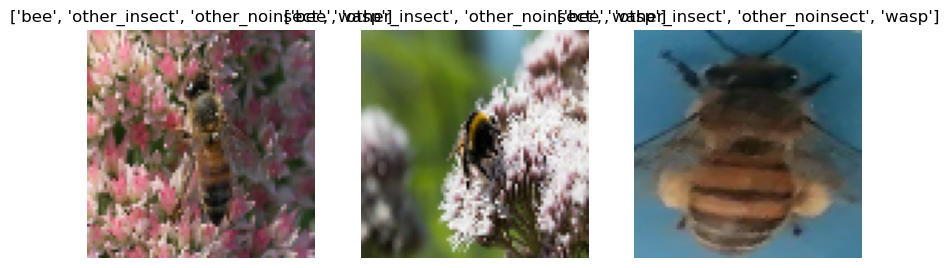

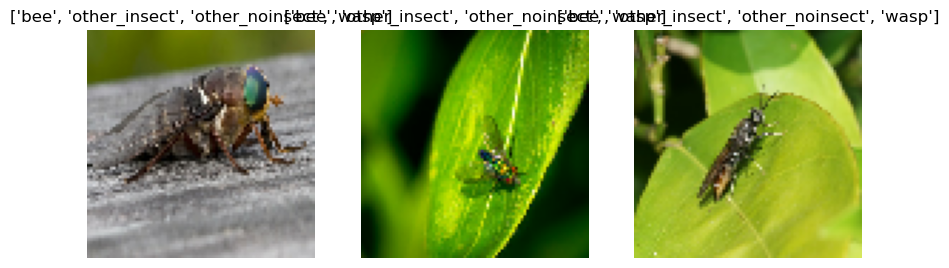

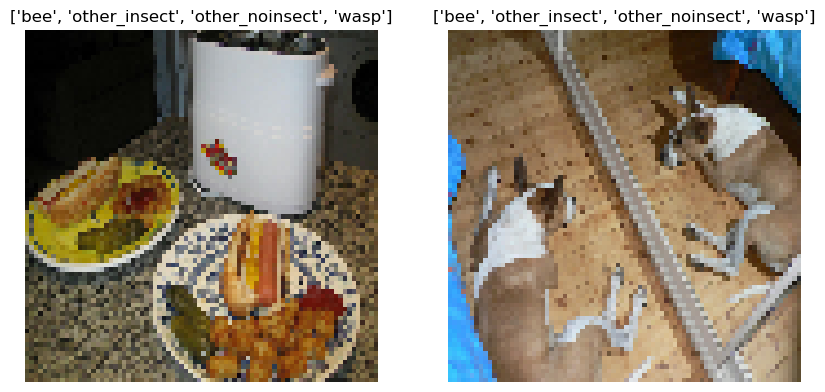

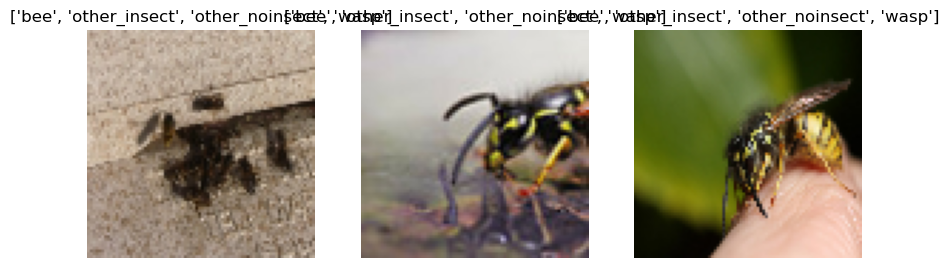

<BatchDataset element_spec=(TensorSpec(shape=(None, 80, 80, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [2]:
def load_display_data(path, batch_size=32, shape=(80,80,3), show_pictures=True):
    # Define the directory path
    directory_path = path
    
    # Define the batch size
    batch_size = batch_size
    
    # Define the image size using the 1st 2 elements of the shape parameter
    # We don't need the number of channels here, just the dimensions to use
    image_size = shape[:2]
    
    # Load the dataset
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory_path,
        batch_size=batch_size,
        image_size=image_size,
        validation_split=0.2,
        subset='training',
        seed=123,
        labels='inferred',
        label_mode='int'
    )

    if show_pictures:
        # Get the class names
        class_names = dataset.class_names
        print(class_names)

        # Display 3 images from each of the categories
        for i, class_name in enumerate(class_names ):
            plt.figure(figsize=(10, 10))
            for images, labels in dataset.take(1):
                images = images.numpy()
                labels = labels.numpy()

                # Filter images of the current class
                class_images = images[labels == i]
                
                # Number of images to show, limited by batch_size or specific number
                num_images = min(len(class_images), 3)

                for j in range(num_images):
                    ax = plt.subplot(1, num_images, j + 1)
                    plt.imshow(class_images[j].astype("uint8"))
                    plt.title(class_names)
                    plt.axis("off")
            plt.show()
    return dataset

load_display_data("Data/bee_vs_wasp", batch_size=32, shape=(80,80,3), show_pictures=True)


In [3]:
def make_model(activation='relu', shape=(80,80,3), num_classes=2):
    '''A function to set up a model. 
          Takes in an activation function, shape for the input images, and number of classes.'''
    
    # Define the model
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation, input_shape=shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation=activation),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation=activation),
        layers.Dense(num_classes)
    ])

    return model

In [4]:
def compile_train_model(dataset, model,
                        loss=SparseCategoricalCrossentropy(from_logits=True),
                        optimizer='adam'):

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    # Train the model
    history = model.fit(dataset, epochs=10, validation_data=dataset, validation_split=0.2)
    return model, history

In [5]:
classes = 4

def evaluate_model(dataset, model, history, num_classes=classes):

    # Evaluate the model
    loss, accuracy = model.evaluate(dataset)
    print(f'Test loss: {loss}')
    print(f'Test accuracy: {accuracy}')


    # Plot the training and validation loss over time
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot the training and validation accuracy over time
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Get the class names
    class_names = dataset.class_names

    # Make predictions on the test set
    y_pred = np.argmax(model.predict(dataset), axis=-1)
    
    # Get the true labels
    y_true = np.concatenate([y for x, y in dataset], axis=0)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0:5], class_names)
    plt.yticks([0:5], class_names)
    plt.colorbar()
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.show()

In [6]:
def the_whole_shabang(path, batch_size, shape, activation, loss, optimizer,show_pictures):
    
    dataset = load_display_data(path, batch_size, shape, show_pictures)
    model = make_model(activation=activation, shape=shape, num_classes=classes)
    model, history = compile_train_model(dataset, model, loss=loss,
                        optimizer=optimizer)
    evaluate_model(dataset, model, history, classes)

Found 11421 files belonging to 4 classes.
Using 9137 files for training.
['bee', 'other_insect', 'other_noinsect', 'wasp']


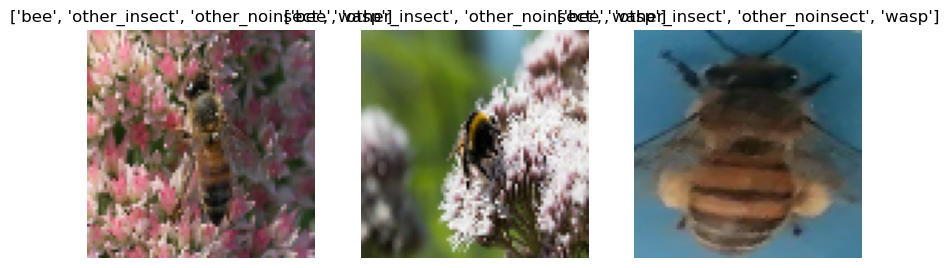

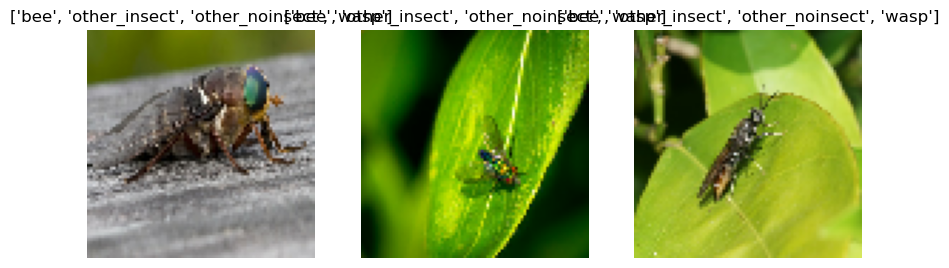

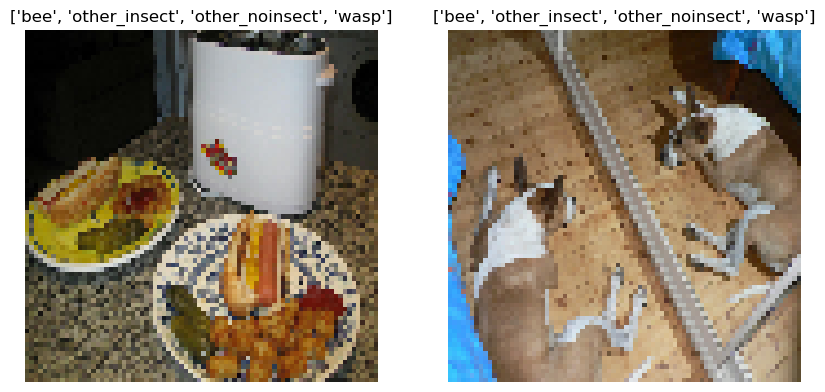

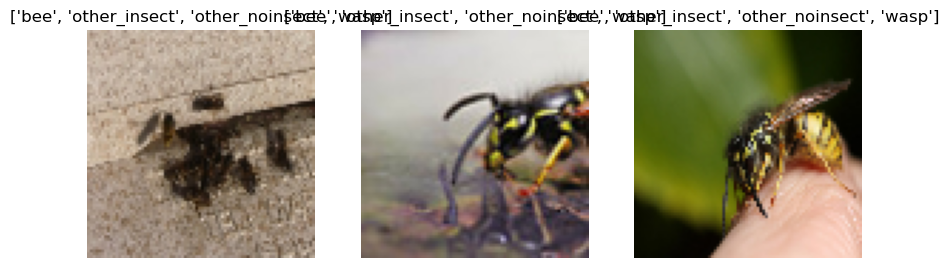

Epoch 1/10
286/286 [==============================] - 32s 109ms/step - loss: 2.6373 - accuracy: 0.5827 - val_loss: 0.8425 - val_accuracy: 0.6736
Epoch 2/10
286/286 [==============================] - 67s 234ms/step - loss: 0.8336 - accuracy: 0.6843 - val_loss: 0.7593 - val_accuracy: 0.7064
Epoch 3/10
286/286 [==============================] - 122s 425ms/step - loss: 0.7345 - accuracy: 0.7160 - val_loss: 0.6619 - val_accuracy: 0.7508
Epoch 4/10
286/286 [==============================] - 102s 355ms/step - loss: 0.6649 - accuracy: 0.7486 - val_loss: 0.6218 - val_accuracy: 0.7641
Epoch 5/10
286/286 [==============================] - 113s 395ms/step - loss: 0.6100 - accuracy: 0.7668 - val_loss: 0.5603 - val_accuracy: 0.7913
Epoch 6/10
286/286 [==============================] - 60s 210ms/step - loss: 0.5605 - accuracy: 0.7870 - val_loss: 0.5122 - val_accuracy: 0.8101
Epoch 7/10
286/286 [==============================] - 64s 222ms/step - loss: 0.5156 - accuracy: 0.8103 - val_loss: 0.4820 - val

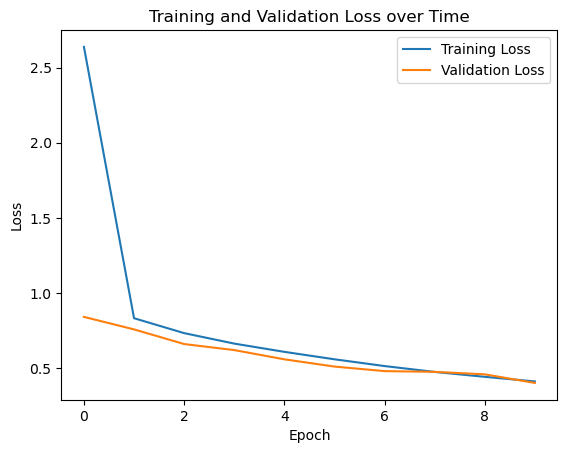

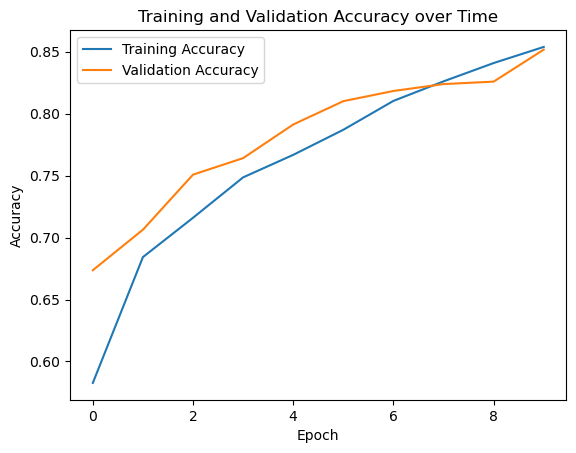

286/286 [==============================] - 20s 70ms/step


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (4).

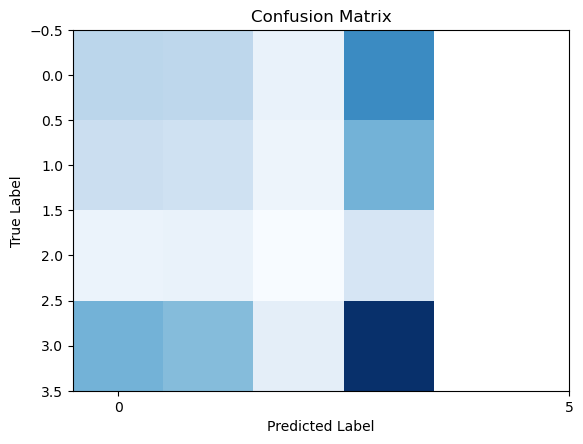

In [7]:
path = 'Data/bee_vs_wasp/' # Path to the data.
                              # Only change this if you change the dataset or where it is located

show_pictures = True # Show sample images from the dataset? Keep on at first, but may become distracting.
                     # Set to False to turn off
# Hyperparameters
shape = (80,80,3)  # Dimensions to use for the images...the raw data are 80x80
                   #  color images, but you could down-sample them
                   #  or convert them to black and white if you wanted
batch_size = 32  # What batch size to use
classes = 6 # We have 2 classes in our example: ship and no_ship. 
            # Only change this if you change the dataset
activation='relu' # The activation function is an important hyperparameter

loss=SparseCategoricalCrossentropy(from_logits=True)
optimizer='adagrad'  # adam, RMSprop, adagrad 

# Run everything with these hyperparameters
the_whole_shabang(path, batch_size, shape, activation, loss, optimizer, show_pictures)